In [76]:
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt
from cProfile import run
from email.mime import image
from matplotlib import pyplot as plt
import pytesseract
from pytesseract import Output
import cv2
from skimage import io
import numpy as np
from pathos.threading import ThreadPool
import numpy as np

# from easyocr import Reader
import pandas as pd
from functools import wraps
import time
import multiprocessing
from utils import forward_passer, box_extractor
from imutils.object_detection import non_max_suppression


frame = cv2.imread(r"C:\Users\User\Desktop\MarathonVisionOCR\data\snapshot_2.png")

In [77]:
yunet = cv2.FaceDetectorYN.create(
    model=r"C:\Users\User\Desktop\MarathonVisionOCR\libfacedetection\yunet.onnx",
    config='',
    input_size=(320, 320),
    score_threshold=0.6,
    nms_threshold=0.3,
    top_k=5,
    backend_id=cv2.dnn.DNN_BACKEND_DEFAULT,
    target_id=cv2.dnn.DNN_TARGET_CPU
)
yunet.setInputSize([frame.shape[1], frame.shape[0]])
_, faces = yunet.detect(frame) # # faces: None, or nx15 np.array


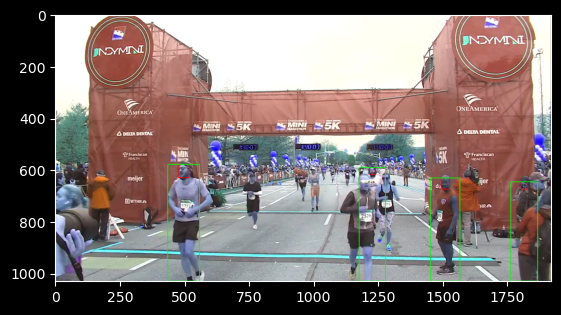

In [78]:
res = frame.copy()
regions = []
for face in faces:
    coords = face[:-1].astype(np.int32)
    x,y,w, h, *_ = coords
    cv2.rectangle(res, (x,y), (x+w, y+h), (255, 0, 0), 2)
    extend= 40
    x = max(0, x-extend)
    w = min(res.shape[1], w + 2*extend)
    h = res.shape[0] 
    # Draw face bounding box
    cv2.rectangle(res, (x,y), (x+w, h), (0, 255, 0), 2)
    regions.append((x,y,x+w,h))

plt.imshow(res)


In [ ]:

# layers used for ROI recognition
layer_names = ["feature_fusion/Conv_7/Sigmoid", "feature_fusion/concat_3"]

# self.compute_mask()
# masked_img_rgb = cv2.cvtColor(self.img_masked, cv2.COLOR_GRAY2RGB)
# getting results from the model
scores, geometry = forward_passer(NETWORK, self.resized, layers=layer_names)

# decoding results from the model
rectangles, confidences = box_extractor(scores, geometry, min_confidence)

rectangles = np.array(rectangles)
confidences = np.array(confidences)
max_rect = 10
inds = confidences.argsort()[::-1][:max_rect]
rectangles = rectangles[inds]
confidences = confidences[inds]

# applying non-max suppression to get boxes depicting text regions
boxes = non_max_suppression(rectangles, probs=confidences)
rois = []

extension = 0
for (start_x, start_y, end_x, end_y) in boxes:
    start_x = int(start_x * self.ratio_w) - extension
    start_y = int(start_y * self.ratio_h) - extension
    end_x = int(end_x * self.ratio_w) + extension
    end_y = int(end_y * self.ratio_h) + extension
    roi = (start_x, start_y, end_x - start_x, end_y - start_y)
    rois.append(roi)
    cv2.rectangle(self.res_image, (start_x, start_y), (end_x, end_y), (0, 0, 255), 2)

In [79]:
340//32

10